# 005: Implement CV

In [23]:
import json
from dataclasses import asdict
import sys

import numpy as np

sys.path.append("../")
from models import LogisticRegression
from visualizations import plot_losses
from model_selection import cross_validation

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
train = np.load("../data/dataset_prep/train.npz")
x_train, y_train = train["x_train"], train["y_train"]

In [39]:
num_samples = int(1e5)
cv_results = cross_validation(LogisticRegression, x_train[:num_samples], y_train[:num_samples], num_folds=5, verbose=False, weighting=True)

Starting fold 1/5 with 80000 samples
Starting fold 2/5 with 80000 samples
Starting fold 3/5 with 80000 samples
Starting fold 4/5 with 80000 samples
Starting fold 5/5 with 80000 samples


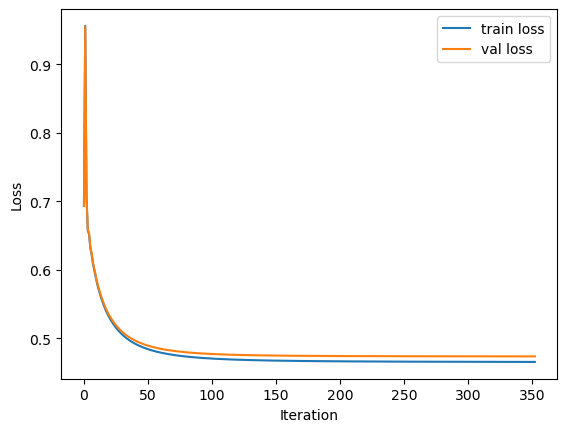

In [36]:
plot_losses(cv_results.train_result[0].train_losses, cv_results.train_result[0].val_losses)

In [37]:
print(f"Average train F1-score: {np.mean(cv_results.f1_scores):.3f} ± {np.std(cv_results.f1_scores):.3f}")
print(f"Average train F2-score: {np.mean(cv_results.f2_scores):.3f} ± {np.std(cv_results.f2_scores):.3f}")
print(f"Average train AUC-ROC: {np.mean(cv_results.auc_rocs):.3f} ± {np.std(cv_results.auc_rocs):.3f}")

Average train F1-score: 0.416 ± 0.003
Average train F2-score: 0.464 ± 0.003
Average train AUC-ROC: 0.854 ± 0.002


In [21]:
print(f"Average train F1-score: {np.mean(cv_results.f1_scores):.3f} ± {np.std(cv_results.f1_scores):.3f}")
print(f"Average train F2-score: {np.mean(cv_results.f2_scores):.3f} ± {np.std(cv_results.f2_scores):.3f}")
print(f"Average train AUC-ROC: {np.mean(cv_results.auc_rocs):.3f} ± {np.std(cv_results.auc_rocs):.3f}")

Average train F1-score: 0.417 ± 0.004
Average train F2-score: 0.485 ± 0.017
Average train AUC-ROC: 0.856 ± 0.003


In [15]:
def append_jsonl(obj, path):
    """Append a dataclass (or dict) as one JSON line to a file."""
    if not isinstance(obj, dict):
        obj = asdict(obj)
    with open(path, "a", encoding="utf-8") as f:
        json.dump(obj, f)
        f.write("\n")

In [22]:
append_jsonl(cv_results, "../results/cv_results.jsonl")